<a href="https://colab.research.google.com/github/dinaOuahbi/Data-Analysis-and-Machine-Learning-Projects/blob/master/Scanpy_pp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scanpy

     |████████████████████████████████| 2.0 MB 12.7 MB/s 
     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 91 kB 6.4 MB/s 
     |████████████████████████████████| 1.1 MB 63.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=a8fd6f525b4ade350445ad7ae021c6c51287b3445130fcf11d0dd47d1db0fa35
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=86ff5f017fc7331419fd9b48d286bf55f182c539a19ebc8fee8b439bd70a3e07
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=0c8083ab4acb14ad26650a682b6d0c80e11d09815dca0bc569ae2f5e7631fa34
  Stored in directory: /root/.cache/p

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [5]:
results_file = "\pbmc3k.h5ad"

In [6]:
large_root = '/content/drive/MyDrive/scRNA_seq_Day1'

In [7]:
#load data
print("Reading data...")
adata = sc.read_10x_mtx(large_root, var_names = 'gene_symbols',
                        cache=True)

Reading data...
... writing an h5ad cache file to speedup reading next time


In [18]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [15]:
adata.var['gene_ids']

MIR1302-10      ENSG00000243485
FAM138A         ENSG00000237613
OR4F5           ENSG00000186092
RP11-34P13.7    ENSG00000238009
RP11-34P13.8    ENSG00000239945
                     ...       
AC145205.1      ENSG00000215635
BAGE5           ENSG00000268590
CU459201.1      ENSG00000251180
AC002321.2      ENSG00000215616
AC002321.1      ENSG00000215611
Name: gene_ids, Length: 32738, dtype: object

normalizing counts per cell
    finished (0:00:00)


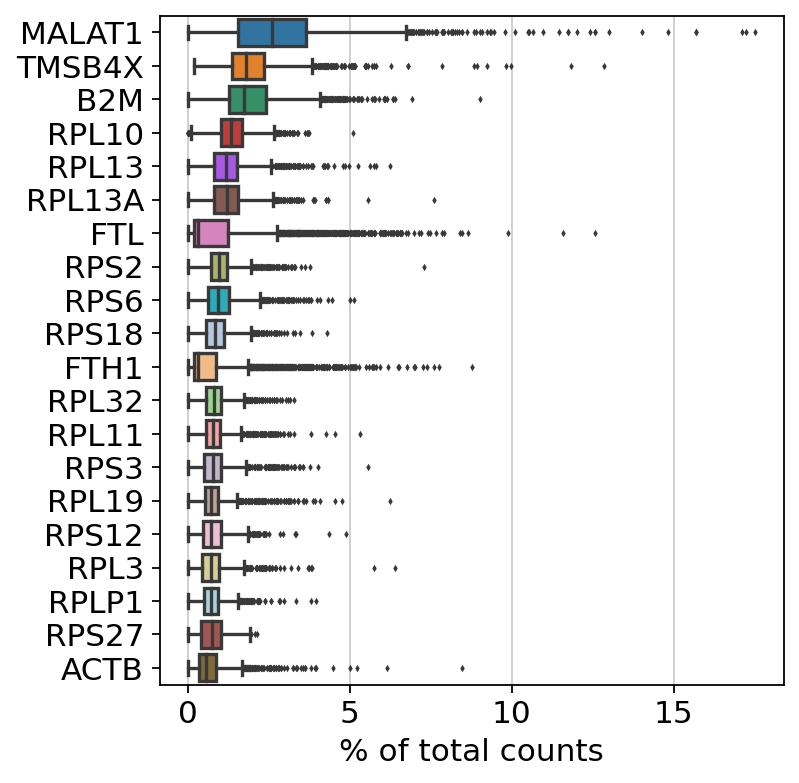

In [16]:
#show genes that yield highest fraction of counts
sc.pl.highest_expr_genes(adata, n_top=20)


In [30]:
print('there is {} mito genes within data'.format(adata.var_names.str.startswith('MT-').sum()))
# annotate mitochondrial genes as 'mt' and 
adata.var['mt'] = adata.var_names.str.startswith('MT-')

there is 13 mito genes within data


**standard metrics in sc-RNA_seq are**

1=> profondeur de comptage (count depth) par barcode

2=> nombre de gene par barcode

3=> fraction de comptes de genes mithochondrial par barcode

In [31]:
#calculate qc metrics 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [35]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

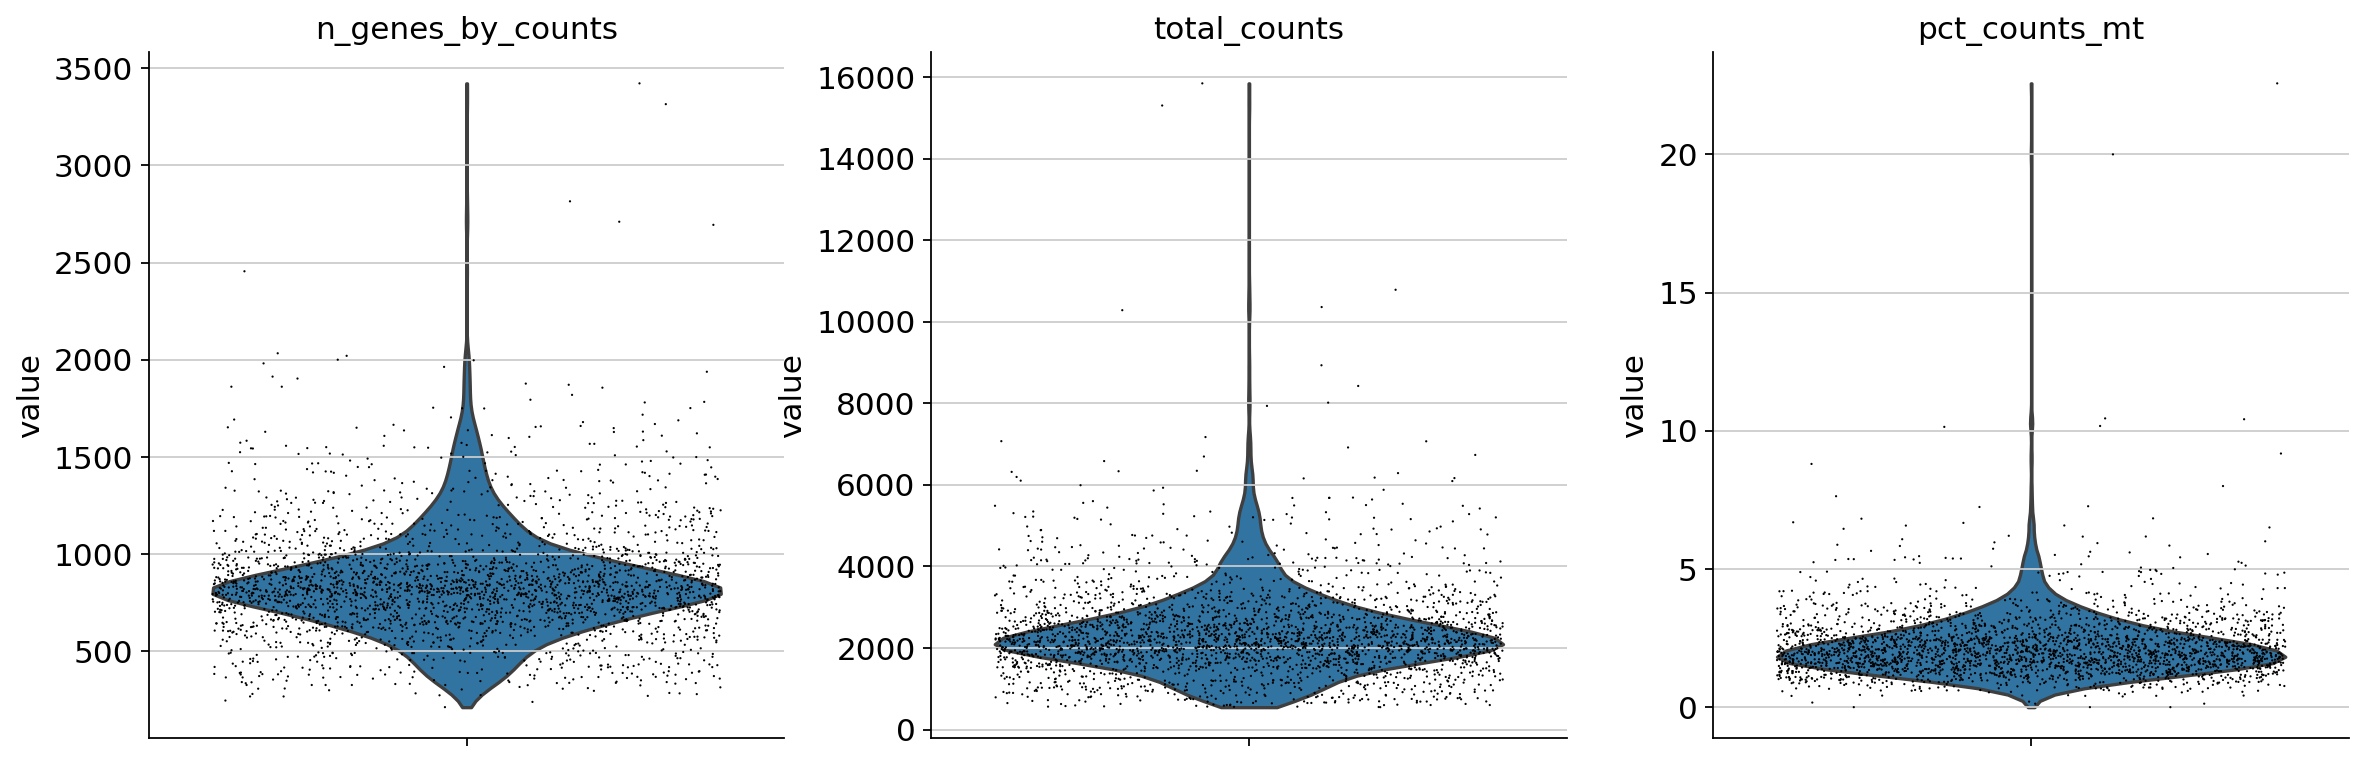

In [36]:
# plot a violin plot with some QC metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [37]:
adata.obs['n_genes_by_counts']

AAACATACAACCAC-1     781
AAACATTGAGCTAC-1    1352
AAACATTGATCAGC-1    1131
AAACCGTGCTTCCG-1     960
AAACCGTGTATGCG-1     522
                    ... 
TTTCGAACTCTCAT-1    1155
TTTCTACTGAGGCA-1    1227
TTTCTACTTCCTCG-1     622
TTTGCATGAGAGGC-1     454
TTTGCATGCCTCAC-1     724
Name: n_genes_by_counts, Length: 2700, dtype: int32

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


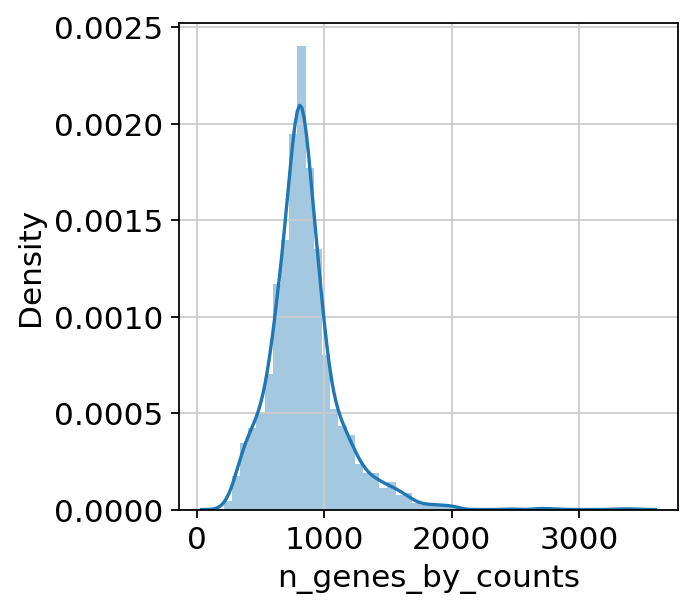

In [38]:
# plot a histograph of a single variable
sns.distplot(adata.obs["n_genes_by_counts"])

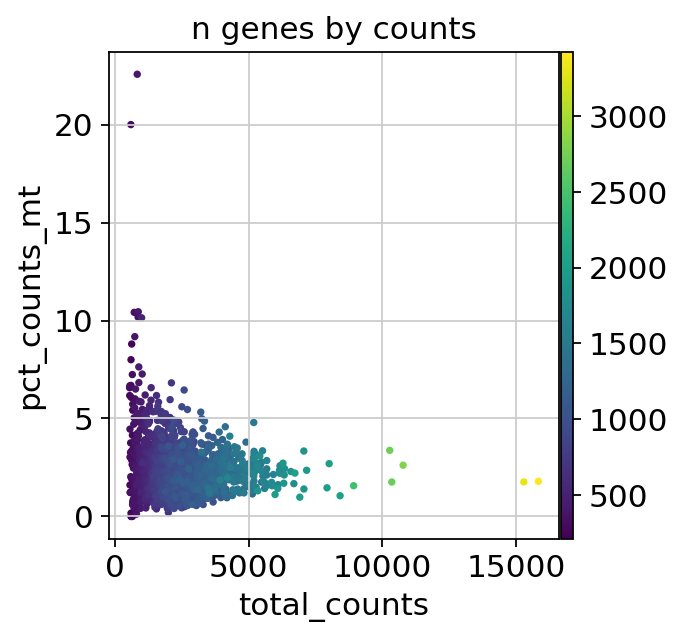

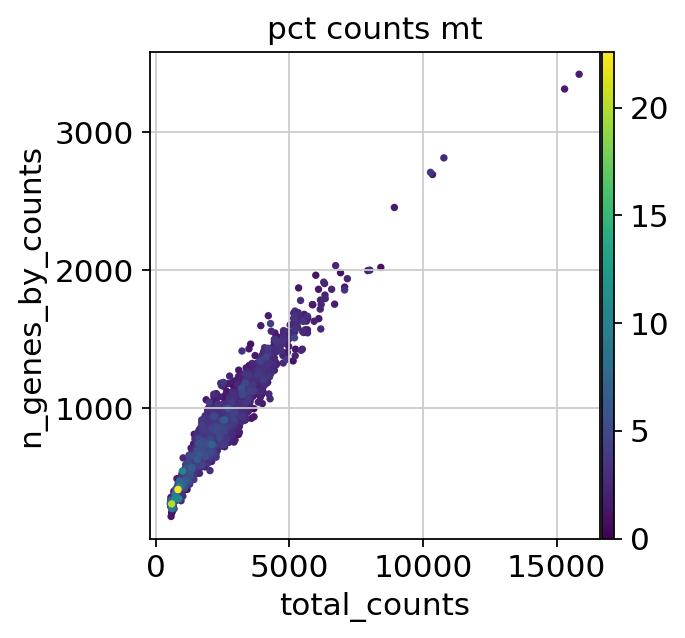

<Figure size 320x320 with 0 Axes>

In [42]:
# plot a scatter plot of QC metrics
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color = 'n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color = 'pct_counts_mt')
# save plot as .eps or .png or .pdf
plt.savefig(large_root + "/" + " QCbefore.png")


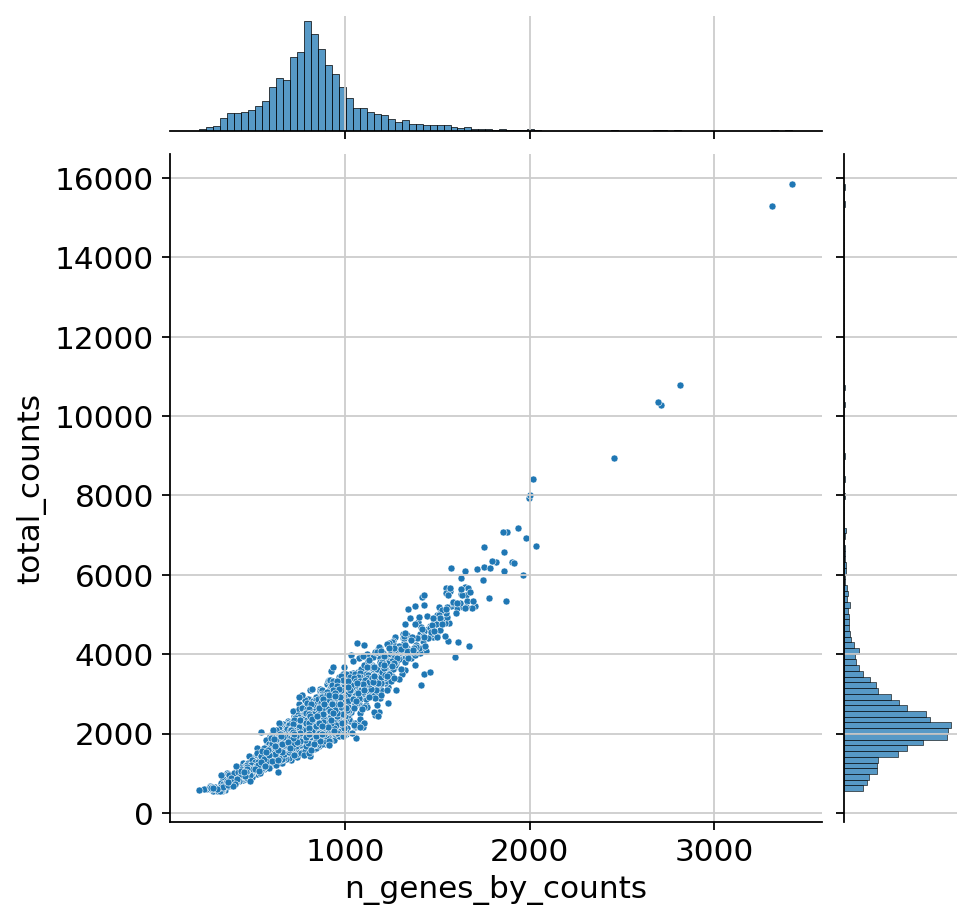

In [44]:
# Joint distribution with marginal histograms:
sns.jointplot(
    x="n_genes_by_counts",
    y="total_counts",
    data=adata.obs,
    kind="scatter",
    s=10
)

In [46]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [49]:
#basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3) # delete genes expressed in less than 3 cells

filtered out 19024 genes that are detected in less than 3 cells


In [51]:
# actually do the filtering by slicing the AnnData object
bdata = adata
bdata = bdata[bdata.obs.n_genes_by_counts < 2200, :]
bdata = bdata[bdata.obs.pct_counts_mt < 5, :]

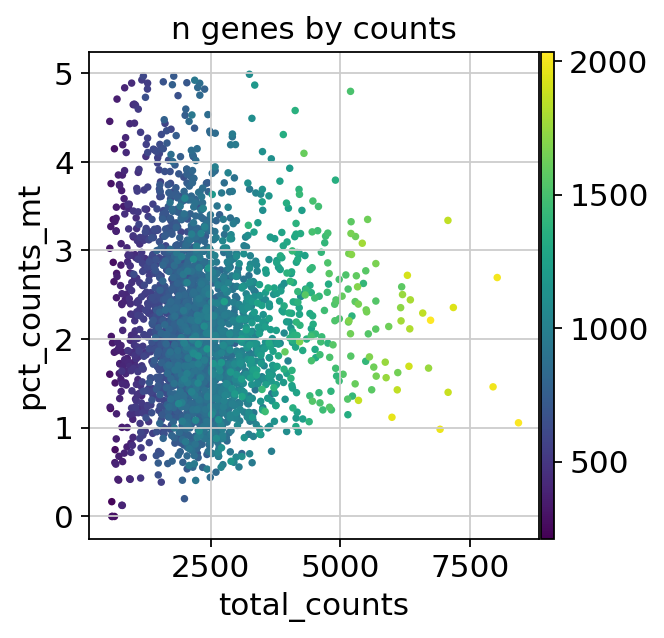

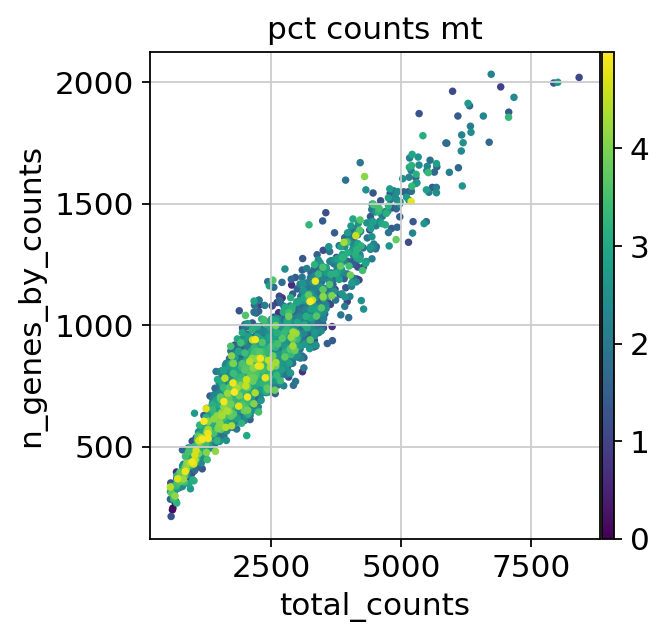

In [52]:
# plot a scatter plot of filtered data
sc.pl.scatter(bdata, x='total_counts', y='pct_counts_mt', color = 'n_genes_by_counts')
sc.pl.scatter(bdata, x='total_counts', y='n_genes_by_counts', color = 'pct_counts_mt')

In [56]:
df = pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)

In [57]:
df.shape

(2700, 13714)

In [60]:
df.dtypes.unique()

array([dtype('float32')], dtype=object)

In [68]:
df.isna().any().unique()

array([False])

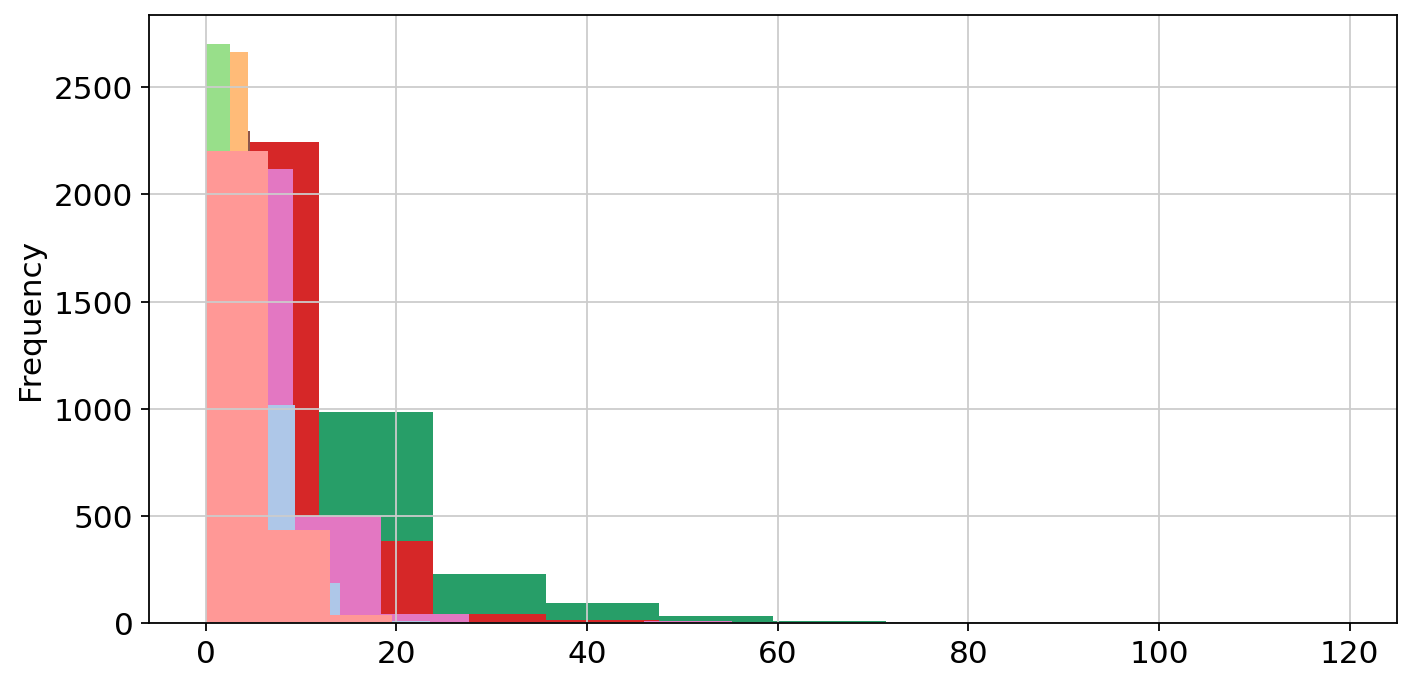

In [83]:
mt_gene = adata.var['mt'][adata.var['mt'] == True].index
for col in mt_gene:
  df[col].plot(kind='hist', figsize=(10,5))